In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# import seaborn as sns

seattle = pd.read_csv('input/seattle/listings.csv')
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [19]:
## Check the stats of 
print("Mean of all the feature")
print(seattle.mean())
print("Median of all the feature")
print(seattle.median())

Mean of all the feature
id                                5.550111e+06
scrape_id                         2.016010e+13
host_id                           1.578556e+07
host_listings_count               7.157757e+00
host_total_listings_count         7.157757e+00
latitude                          4.762896e+01
longitude                        -1.223331e+02
accommodates                      3.349398e+00
bathrooms                         1.259469e+00
bedrooms                          1.307712e+00
beds                              1.735394e+00
square_feet                       8.546186e+02
guests_included                   1.672603e+00
minimum_nights                    2.369303e+00
maximum_nights                    7.804476e+02
availability_30                   1.678628e+01
availability_60                   3.681482e+01
availability_90                   5.808250e+01
availability_365                  2.447727e+02
number_of_reviews                 2.222342e+01
review_scores_rating              9.

/usr/local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [21]:
## Find the missing values in the dataset

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
df_clean = missing_values_table(seattle)
df_clean

Your selected dataframe has 92 columns.
There are 45 columns that have missing values.


,Missing Values,% of Total Values
license,3818,100.0
square_feet,3721,97.5
monthly_price,2301,60.3
security_deposit,1952,51.1
weekly_price,1809,47.4
notes,1606,42.1
neighborhood_overview,1032,27.0
cleaning_fee,1030,27.0
transit,934,24.5
host_about,859,22.5


In [22]:
seattle['price'].replace('[\$,]', '', regex=True, inplace=True)
seattle['price'] = seattle['price'].astype(float)

# How is the pricing differ across airbnb?

In [23]:
def preclean(df):
    '''
    INPUT:
    df - the dataframe 
    
    OUTPUT:
    X - cleaned dataframe that containes all variables which may affect target variable
    y - cleaned dataframe of target variable('price')
    
    Split the original dataframe to target variable and others. Clean the data by
    1) Drop the row with NaN target variable
    2) Imputing NaN values for numerical variables
    3) Create dummies for categorical values
    
    For all variables which may affect target variable, we focus on columns of 'neighbourhood_cleansed', 
    'property_type', 'room_type', 'accommodates' and 'bedrooms'.
    '''
    
    df['price'].replace('[\$,]', '', regex=True, inplace=True)
    df['price'] = df['price'].astype(float)
    
    df = df.dropna(subset=['price'], axis=0)
    
    y = df['price']
    
    X = df[['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bedrooms']]
    
    num_vars = X.select_dtypes(include=['int', 'float']).columns
    
    for col in num_vars:
        X[col].fillna((X[col].median()), inplace=True)
    
    cat_vars = X.select_dtypes(include=['object']).columns
    
    for var in cat_vars:
        X = pd.concat([X.drop([var], axis=1), pd.get_dummies(X[var], drop_first=True)], axis=1)
    
    return X, y

X_sea, y_sea = preclean(seattle)
X_sea.head()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,accommodates,bedrooms,Alki,Arbor Heights,Atlantic,Belltown,Bitter Lake,Briarcliff,Brighton,Broadview,...,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Private room,Shared room
0,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,5.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
## Verify no missing values in columns
missing_values_table(X_sea)

Your selected dataframe has 105 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Text(0, 0.5, 'frequency')

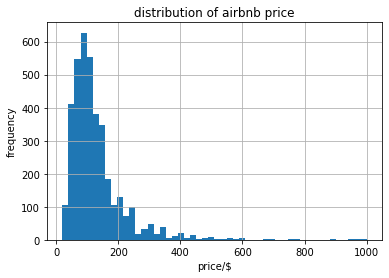

In [38]:
y_sea.hist(bins=50)
plt.title('distribution of airbnb price')
plt.xlabel('price/$')
plt.ylabel('frequency')

In [25]:
price_mean = "{0:.1f}".format(y_sea.mean())
price_median = y_sea.median()
print(f'house average rental price is {price_mean}')
print(f'house median rental price is {price_median}')

house average rental price is 128.0
house median rental price is 100.0


# Which Feature affect listing price the most in Seattle, and how?

In [26]:
#Split into train and test
X_sea_train, X_sea_test, y_sea_train, y_sea_test = train_test_split(X_sea, y_sea, test_size = .30, random_state=42) 

lm_model_sea = LinearRegression(normalize=True) # Instantiate
lm_model_sea.fit(X_sea_train, y_sea_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
#Predict and score the model
y_sea_test_preds = lm_model_sea.predict(X_sea_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_sea_test, y_sea_test_preds), len(y_sea_test))

'The r-squared score for your model was 0.5753977047349397 on 1146 values.'

In [28]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_sea_df = coef_weights(lm_model_sea.coef_, X_sea_train)

#A quick look at the top results
coef_sea_df.head(30)

,est_int,coefs,abs_coefs
89,Boat,167.008327,167.008327
95,Dorm,-137.612410,137.612410
62,Portage Bay,87.645485,87.645485
74,Southeast Magnolia,85.342999,85.342999
61,Pioneer Square,85.109503,85.109503
59,Pike-Market,83.425280,83.425280
33,Industrial District,78.737785,78.737785
84,Westlake,68.618492,68.618492
104,Shared room,-66.050278,66.050278
82,West Queen Anne,63.602031,63.602031


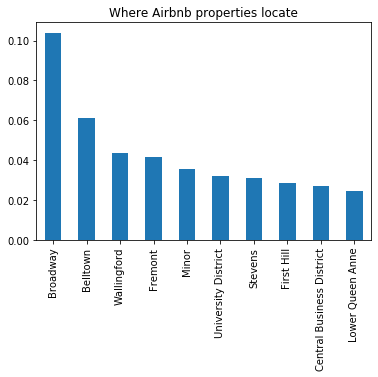

In [29]:
loc_vals = seattle['neighbourhood_cleansed'].value_counts()

(loc_vals[0:10]/seattle.shape[0]).plot(kind="bar");
plt.title("Where Airbnb properties locate");

In [30]:
seattle['neighbourhood_cleansed'].value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

# What are the most important things to tenants?

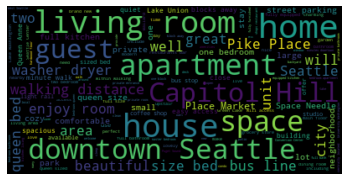

In [32]:
from wordcloud import WordCloud
from functools import reduce
def generate_wordcould(text_list):
    """generate and visulize a text vector that in list-like form"""
    text = reduce((lambda x, y: x+y), text_list)
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
generate_wordcould(seattle['description'])